<a href="https://colab.research.google.com/github/muyale/Data-Science/blob/main/Udemy_Courses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [185]:
udemy_df = pd.read_csv("/content/udemy_courses.csv")
udemy_df.head()
udemy_df.drop_duplicates()
udemy_df.drop(['published_timestamp'],axis=1,inplace=True)

In [186]:
udemy_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


In [187]:
udemy_df.columns
udemy_df.isnull().sum()
#Our dataset has no null values


course_id           0
course_title        0
url                 0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
dtype: int64

In [188]:
#Most picked subjects in Udemy: to solve this we will use a function
def most_common(column,df=udemy_df):
  """Args :
     column(str) :This is the column we are investigating
     df(Df): This is the dataframe that we are analyzing
     Returns :

  """
  return df[column].value_counts().head(10)

 

In [189]:
most_common('subject')
# Majority chose Web Development subject ,followed by Business Finance

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [190]:
# Most common Courses
most_common('course_title')
#Acoustic Blues Guitar Lessons Dominated 

Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
CFA Level 2- Quantitative Methods                               2
Essentials of money value: Get a financial Life !               2
Drum Lessons For Beginners                                      2
MicroStation - Células                                          2
Understanding Financial Statements                              2
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours          2
The Complete Web Developer Masterclass: Beginner To Advanced    2
Introduction to Forex Trading Business For Beginners            2
Name: course_title, dtype: int64

In [191]:
#Highest and Lowest paid courses
udemy_df['price'].describe()
#The maximum amount paid was 200 Dollars ,there were free courses

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [192]:
#Top 10 prices for courses
prices = most_common('price')
prices
#There were 310 free courses,it seems like a majority of course  tutors set their prices at 20 dollars

20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
Name: price, dtype: int64

In [193]:
# How many beginners,all levels and intermediate?
most_common('level')
# Seems like only a few chose the Expert Level as Compared to the huge number  of beginner courses

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [194]:
#Highest Duration
most_common('content_duration')
# 1 HR COURSES DOMINATED ,Preference of Courses is based on 

1.0    607
1.5    507
2.0    419
2.5    269
3.0    248
3.5    182
4.0    145
4.5    113
5.0    108
5.5     94
Name: content_duration, dtype: int64

In [195]:
#Total Amount of money collected by Udemy
total_money = udemy_df.groupby('price').sum()
#total_money = udemy_df.groupby('price')['num_subscribers'].agg('sum')
total_money

,course_id,is_paid,num_subscribers,num_reviews,num_lectures,content_duration
price,,,,,,
0,214348561,0,3575525,132038,6639,685.333333
20,493951172,830,1320658,27107,20956,1995.333333
25,101446277,154,170861,6003,4213,408.750000
30,113956768,166,286714,11505,5086,553.966667
35,75189756,116,116300,3836,3580,350.800000
40,160744504,217,200217,7306,6845,659.483333
45,57428291,83,99011,3704,2484,250.766667
50,283676556,468,717383,26427,20738,2230.400000
55,23592828,35,47561,1374,1018,76.866667


"""EXPLORATORY DATA ANALYSIS 
this I will do using the seaborn and matplotlib libraries """

In [196]:
# Checking for correlation
udemy_corr = udemy_df.corr()
udemy_corr
# price correlated with everything else ,we can create a  LM model to predic future prices

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


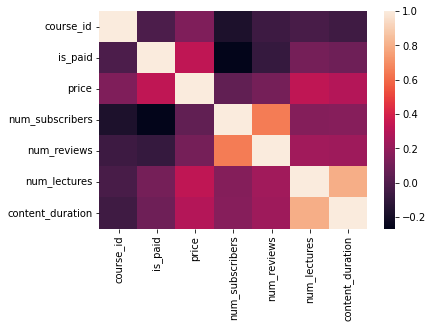

In [197]:
sns.heatmap(udemy_corr)

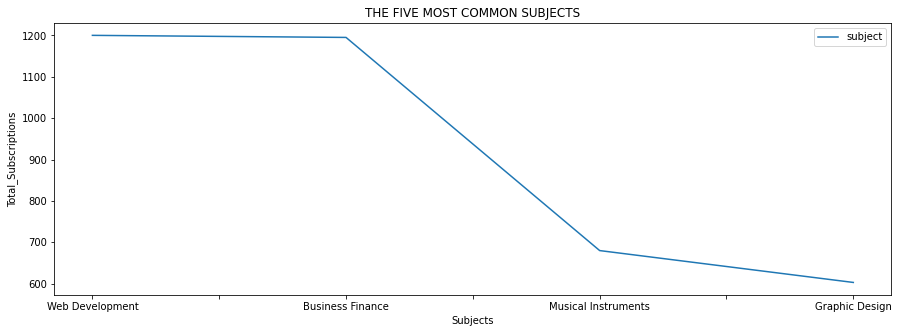

In [198]:
subject = most_common('subject')
plt.title('THE FIVE MOST COMMON SUBJECTS')
plt.xlabel('Subjects')
plt.ylabel('Total_Subscriptions')
subject.plot(figsize=(15,5),legend=True)

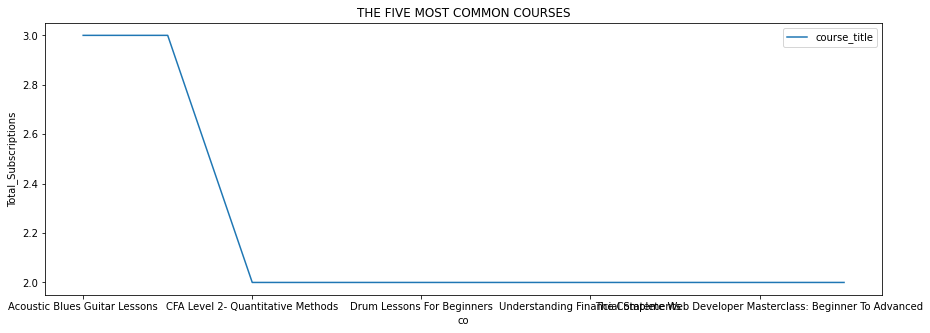

In [199]:
subject = most_common('course_title')
plt.title('THE FIVE MOST COMMON COURSES')
plt.xlabel('co')
plt.ylabel('Total_Subscriptions')
subject.plot(figsize=(15,5),legend=True)

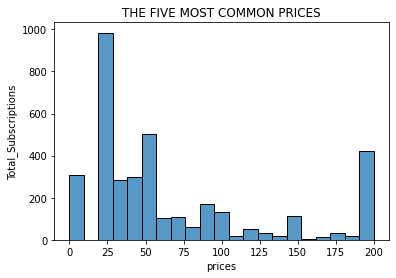

In [200]:
from IPython.core.prefilter import PrefilterChecker
PrefilterChecker = most_common('price')
plt.title('THE FIVE MOST COMMON PRICES')
plt.xlabel('prices')
plt.ylabel('Total_Subscriptions')
sns.histplot(x=udemy_df['price'] )

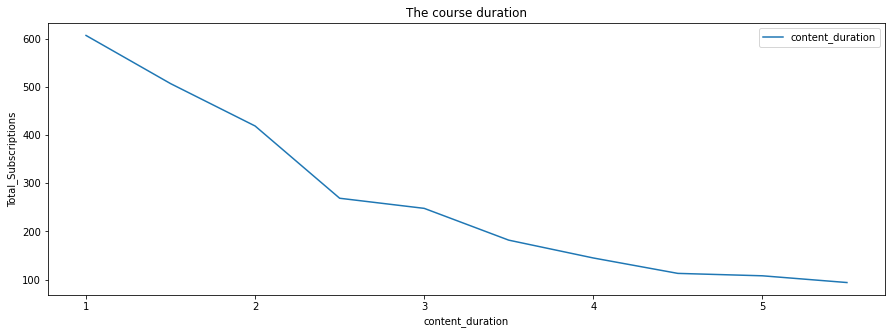

In [201]:
# How were the courses distributed in time
subject = most_common('content_duration')
plt.title('The course duration')
plt.xlabel('content_duration')
plt.ylabel('Total_Subscriptions')
subject.plot(figsize=(15,5),legend=True)
#The longer the duration the less the subscription

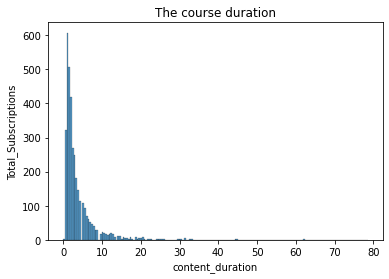

In [202]:
duration = most_common('content_duration')
plt.title('The course duration')
plt.xlabel('content_duration')
plt.ylabel('Total_Subscriptions')
sns.histplot(x=udemy_df['content_duration'])


Text(0.5, 1.0, 'A PAIRPLOT FOR MY FEATURES')

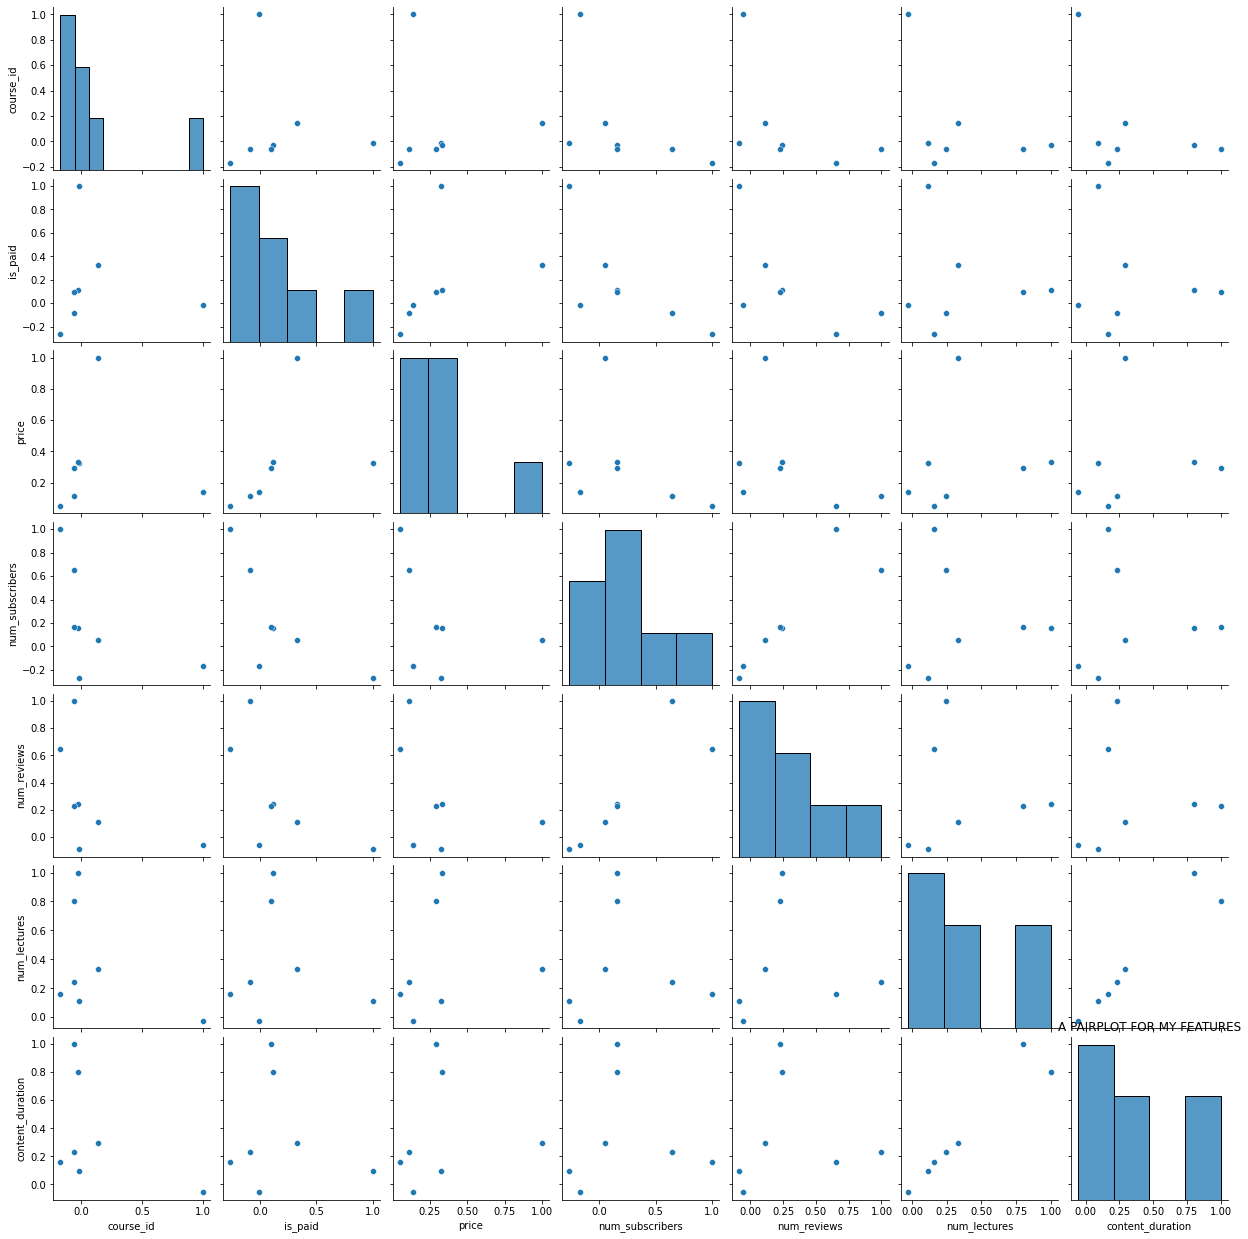

In [203]:
sns.pairplot(data=udemy_corr)
plt.title('A PAIRPLOT FOR MY FEATURES')
# For all the numeric features I created a pairplot 

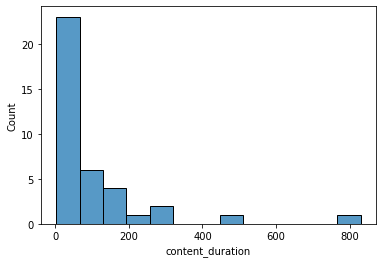

In [204]:
#Total Amount of money collected by Udemy
total_money = udemy_df.groupby('price')
total_money = udemy_df.groupby('price')['content_duration'].agg('count')
sns.histplot(total_money)



In [205]:
def final_plot(column):
  """Args: 
  column(str):The column that we seek to investigate how it generated revenue
   I used  groupby from pandas and count function to total all occurences"""
  total_money = udemy_df.groupby('price')[column].agg('count')
  plt.title('How Money was generated by'+ ""+ column)
  plt.ylabel('No of Subscription')
  plt.xlabel('The {}'.format(column))
  sns.histplot(total_money)

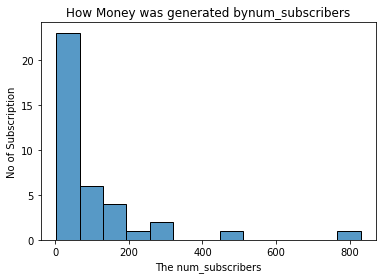

In [206]:
final_plot(column='num_subscribers')

In [207]:
udemy_df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'subject'],
      dtype='object')

In [208]:
udemy_df['is_paid'].value_counts()
# there are only two values ,true and false


True     3368
False     310
Name: is_paid, dtype: int64

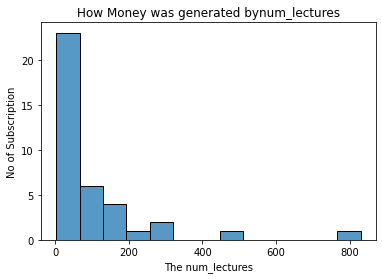

In [209]:
final_plot(column='num_lectures')
#The more the number of lectures ,the less the subscriptions

In [218]:

udemy_df.columns
udemy_df.drop(['course_title'],axis=1,inplace=True)

In [220]:
X = udemy_df.drop(['price'],axis = 1)
y = udemy_df['price']

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

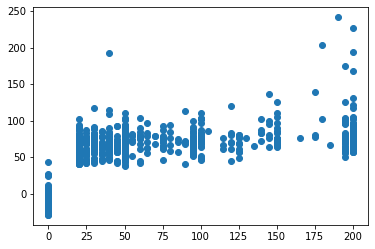

In [222]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
predictions = lin_model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:

# USING REGRESSION EVALUATION METRICS
from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.metrics import  mean_squared_log_error
print(f"The Mean squared error is |{mean_squared_error(y_test,predictions)}")
print(f"The Mean absolute error is |{mean_absolute_error(y_test,predictions)}")
print(f"The Mean Loq Squared error is |{ mean_squared_log_error(y_test,predictions)}")